In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('data/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Finding missing data

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

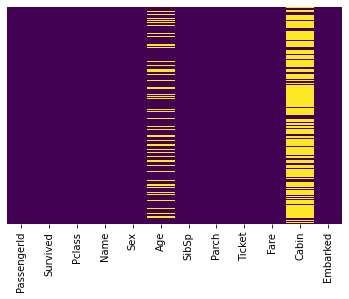

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Data analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

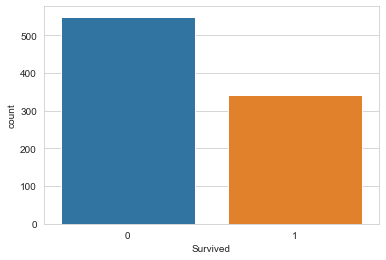

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

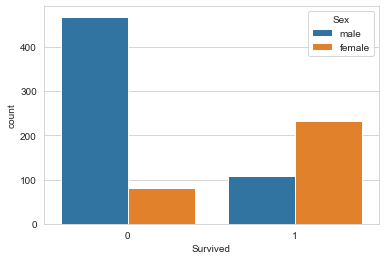

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

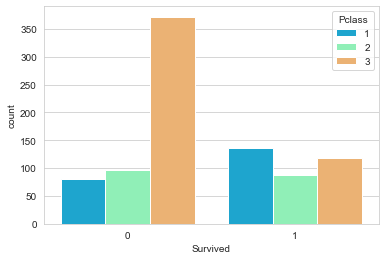

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

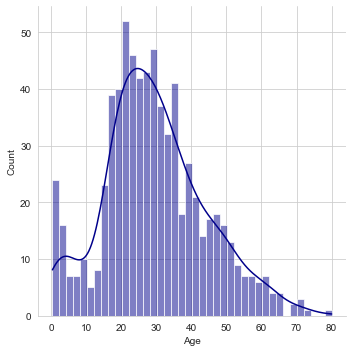

In [27]:
sns.displot(df['Age'].dropna(),kde=True,color='darkblue',bins=40)

<AxesSubplot:>

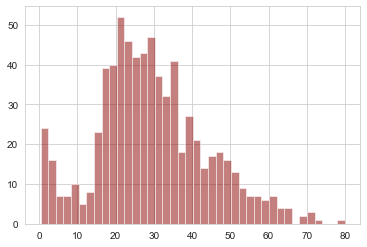

In [39]:
df['Age'].dropna().hist(bins=40,color='darkred',alpha=0.5)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

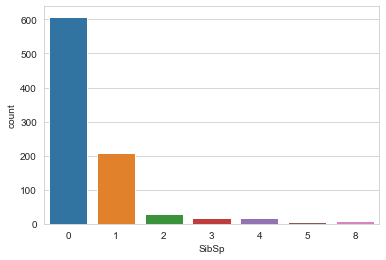

In [40]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot:>

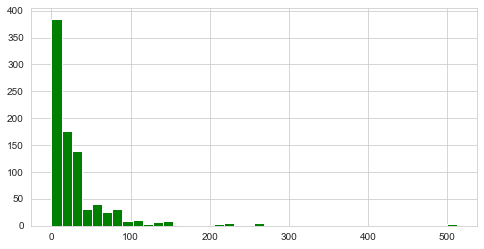

In [41]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

## Data cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

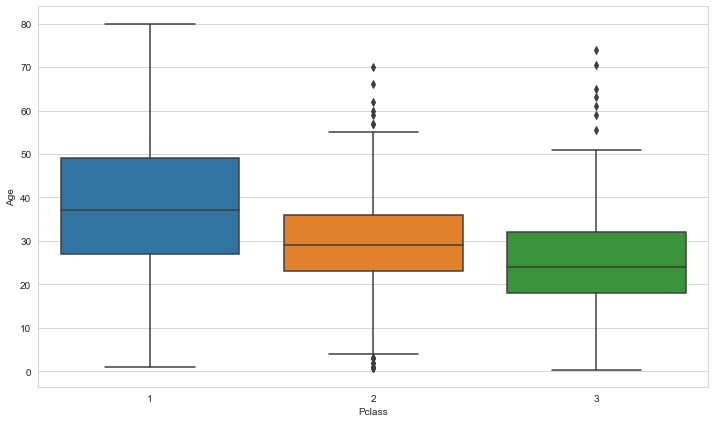

In [45]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df)

In [46]:
df['Age'].median()

28.0

In [48]:
def impute_age(cols):
    Age = cols['Age']
    Pclass = cols['Pclass']
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [49]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

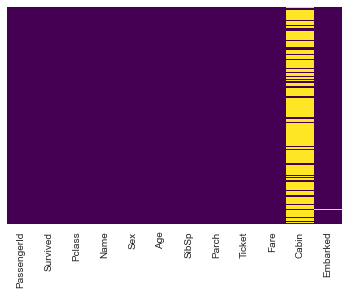

In [51]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [52]:
df.drop('Cabin',axis=1,inplace=True)

In [53]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## One hot encoding

In [55]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [56]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [57]:
df = pd.concat([df,sex,embark],axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building a Logistic Regression model

## Train Test Split

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.20)

## Training and Predicting

In [61]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
accuracy

0.776536312849162

In [65]:
model.score(X_test,y_test)

0.776536312849162

## Model Evaluation

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       105
           1       0.75      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179

